In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import our dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [3]:
# Import our input dataset

# Load the file
file_path = Path('FINAL_NYC_restaurants_full_database.csv')
# Read into a dataFrame
df = pd.read_csv(file_path)
# Show dataFrame
df.head()

,DBA,STREET,INCOME_LEVEL,BOROUGH,ZIPCODE,CUISINE_DESCRIPTION,SCORE,GRADE
0,PATHOS,1 AVENUE,high income,Manhattan,10022,Mediterranean,9,A
1,THE LITTLE BEET,PARK AVENUE,high income,Manhattan,10017,Salads,13,A
2,AMAZE FUSION & LOUNGE,3 AVENUE,high income,Manhattan,10017,Asian/Asian Fusion,27,B
3,NOURISH THAI,VANDERBILT AVENUE,medium income,Brooklyn,11238,Thai,9,A
4,ESSEN,MADISON AVENUE,high income,Manhattan,10017,Sandwiches,13,A


In [4]:
df = df.drop(['DBA', 'STREET', 'CUISINE_DESCRIPTION', 'SCORE'], axis=1)

In [5]:
df.head()

,INCOME_LEVEL,BOROUGH,ZIPCODE,GRADE
0,high income,Manhattan,10022,A
1,high income,Manhattan,10017,A
2,high income,Manhattan,10017,B
3,medium income,Brooklyn,11238,A
4,high income,Manhattan,10017,A


In [6]:
print(df.dtypes)

INCOME_LEVEL    object
BOROUGH         object
ZIPCODE          int64
GRADE           object
dtype: object


In [7]:
# Convert column for ZIPCODE from data type 'int' to str':
df['ZIPCODE'] = df['ZIPCODE'].astype(str)

print(df.dtypes)

INCOME_LEVEL    object
BOROUGH         object
ZIPCODE         object
GRADE           object
dtype: object


In [8]:
# Determine different grades under 'GRADE' column
df['GRADE'].value_counts()

A    7033
B     691
C     222
P     138
Z      90
N      50
Name: GRADE, dtype: int64

In [9]:
# Drop the grades 'N', 'P', and 'Z'
df.drop(df[(df['GRADE'] == 'N') | (df['GRADE'] == 'P') | (df['GRADE'] == 'Z')].index, inplace = True)

In [10]:
# Determine different grades under 'GRADE' column
df['GRADE'].value_counts()

A    7033
B     691
C     222
Name: GRADE, dtype: int64

# Preprocessing

## Normalizing the Categorical Variables

In [11]:
# # Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_cat].nunique()

INCOME_LEVEL     3
BOROUGH          5
ZIPCODE         78
GRADE            3
dtype: int64

In [12]:
ZIPCODE_counts = df.ZIPCODE.value_counts()
print(ZIPCODE_counts)

10013    810
10022    773
10017    564
10009    474
11238    419
        ... 
11233      2
11435      2
11206      1
10473      1
11208      1
Name: ZIPCODE, Length: 78, dtype: int64


<AxesSubplot:ylabel='Density'>

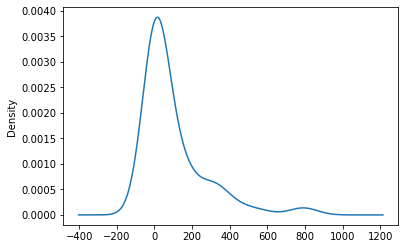

In [13]:
# Visualize the value counts
ZIPCODE_counts.plot.density()

In [14]:
# Determine which values to replace
replace_ZIPCODE = list(ZIPCODE_counts[ZIPCODE_counts < 200].index)

# Replace in DataFrame
for ZIPCODE in replace_ZIPCODE:
    df.ZIPCODE = df.ZIPCODE.replace(ZIPCODE,"Other")


# Check to make sure binning was successful
df.ZIPCODE.value_counts()

Other    2161
10013     810
10022     773
10017     564
10009     474
11238     419
11101     372
10028     344
10023     321
11375     315
10021     315
11355     311
10024     284
10065     280
10452     203
Name: ZIPCODE, dtype: int64

<AxesSubplot:ylabel='Density'>

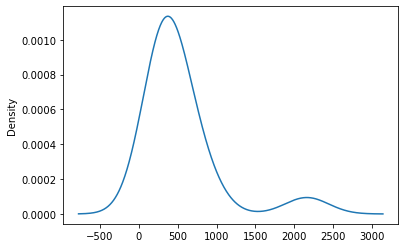

In [15]:
# Visualize the new value counts
ZIPCODE_counts_new = df.ZIPCODE.value_counts()
ZIPCODE_counts_new.plot.density()

In [16]:
# # Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_cat].nunique()

INCOME_LEVEL     3
BOROUGH          5
ZIPCODE         15
GRADE            3
dtype: int64

## Encoding the Variables

### Encoding the variable 'GRADE'

In [17]:
# Creating a 'high' and 'low' grade

# Creating an instance of label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Grade"] = label_encoder.fit_transform(df["GRADE"])
df.head()

,INCOME_LEVEL,BOROUGH,ZIPCODE,GRADE,Grade
0,high income,Manhattan,10022,A,0
1,high income,Manhattan,10017,A,0
2,high income,Manhattan,10017,B,1
3,medium income,Brooklyn,11238,A,0
4,high income,Manhattan,10017,A,0


In [18]:
# Grade dictionary
## The dictionary creates two categories for grades: "high" and "low".
## "high" grade has been made to replace grades A and B, 
## whereas "low" grade has been made to replace all grades lower than A and B.

GRADE_num = {
    "A": "high",
    "B": "high",
    "C": "low",
}

In [19]:
# Grades encoded using the dictionary values
df["GRADE_num"] = df["GRADE"].apply(lambda x: GRADE_num[x])
df.head()

,INCOME_LEVEL,BOROUGH,ZIPCODE,GRADE,Grade,GRADE_num
0,high income,Manhattan,10022,A,0,high
1,high income,Manhattan,10017,A,0,high
2,high income,Manhattan,10017,B,1,high
3,medium income,Brooklyn,11238,A,0,high
4,high income,Manhattan,10017,A,0,high


In [20]:
# Drop the GRADE and Grade columns
df = df.drop(["GRADE", "Grade"], axis=1)
df.head()

,INCOME_LEVEL,BOROUGH,ZIPCODE,GRADE_num
0,high income,Manhattan,10022,high
1,high income,Manhattan,10017,high
2,high income,Manhattan,10017,high
3,medium income,Brooklyn,11238,high
4,high income,Manhattan,10017,high


In [21]:
# # Generate our categorical variable list again
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column again
df[df_cat].nunique()

INCOME_LEVEL     3
BOROUGH          5
ZIPCODE         15
GRADE_num        2
dtype: int64

In [22]:
GRADE_num_counts = df.GRADE_num.value_counts()
print(GRADE_num_counts)

high    7724
low      222
Name: GRADE_num, dtype: int64


### Encoding the Categorical Variables

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()

,INCOME_LEVEL_high income,INCOME_LEVEL_low income,INCOME_LEVEL_medium income,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,ZIPCODE_10009,ZIPCODE_10013,...,ZIPCODE_10028,ZIPCODE_10065,ZIPCODE_10452,ZIPCODE_11101,ZIPCODE_11238,ZIPCODE_11355,ZIPCODE_11375,ZIPCODE_Other,GRADE_num_high,GRADE_num_low
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()

,INCOME_LEVEL_high income,INCOME_LEVEL_low income,INCOME_LEVEL_medium income,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,ZIPCODE_10009,ZIPCODE_10013,...,ZIPCODE_10028,ZIPCODE_10065,ZIPCODE_10452,ZIPCODE_11101,ZIPCODE_11238,ZIPCODE_11355,ZIPCODE_11375,ZIPCODE_Other,GRADE_num_high,GRADE_num_low
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Splitting the Data, and Standardizing the Numerical Variables

In [25]:
# Remove GRADE_num target from features data
y = df.GRADE_num_high
X = df.drop(columns=["GRADE_num_high","GRADE_num_low"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Resampling Models

## Oversampling: Naive Random Oversampling 

In [26]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_resampled)

Counter({1.0: 5598, 0.0: 5598})

In [27]:
y_resampled.shape

(11196,)

In [28]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [29]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [30]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.518


In [31]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive balanced accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive balanced accuracy is: 0.518


In [32]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 32,  21],
       [905, 962]])

In [33]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.03      0.60      0.52      0.06      0.56      0.31        53
        1.0       0.98      0.52      0.60      0.68      0.56      0.31      1867

avg / total       0.95      0.52      0.60      0.66      0.56      0.31      1920



## Oversampling: SMOTE Oversampling

In [34]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train_scaled, y_train
)

Counter(y_resampled)

Counter({1.0: 5598, 0.0: 5598})

In [35]:
y_resampled.shape

(11196,)

In [36]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [37]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [38]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.623


In [39]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive balanced accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive balanced accuracy is: 0.623


In [40]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  27,   26],
       [ 697, 1170]])

In [41]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.04      0.51      0.63      0.07      0.57      0.32        53
        1.0       0.98      0.63      0.51      0.76      0.57      0.32      1867

avg / total       0.95      0.62      0.51      0.74      0.57      0.32      1920



## Undersampling: Cluster Centroids

In [42]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({0.0: 159, 1.0: 159})

In [43]:
y_resampled.shape

(318,)

In [44]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [45]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.133


In [47]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive balanced accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive balanced accuracy is: 0.133


In [48]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  48,    5],
       [1660,  207]])

In [49]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.03      0.91      0.11      0.05      0.32      0.11        53
        1.0       0.98      0.11      0.91      0.20      0.32      0.09      1867

avg / total       0.95      0.13      0.88      0.20      0.32      0.09      1920



## Combination (Over and Under) Sampling: SMOTEENN

In [50]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({0.0: 2065, 1.0: 1418})

In [51]:
y_resampled.shape

(3483,)

In [52]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [53]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [54]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.311


In [55]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive balanced accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive balanced accuracy is: 0.311


In [56]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  32,   21],
       [1302,  565]])

In [57]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.02      0.60      0.30      0.05      0.43      0.19        53
        1.0       0.96      0.30      0.60      0.46      0.43      0.18      1867

avg / total       0.94      0.31      0.60      0.45      0.43      0.18      1920



# Ensemble Learning Models

## Random Forest Classifier

In [58]:
# Create a random forest classifier.
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

In [59]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

Counter(y_train)

Counter({1.0: 5598, 0.0: 159})

In [60]:
y_train.shape

(5757,)

In [61]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [62]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.972


In [63]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive balanced accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive balanced accuracy is: 0.972


In [64]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,53
Actual 1,0,1867


In [65]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.00      0.00      1.00      0.00      0.00      0.00        53
        1.0       0.97      1.00      0.00      0.99      0.00      0.00      1867

avg / total       0.95      0.97      0.03      0.96      0.00      0.00      1920



## Balanced Random Forest Classifier

In [66]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
# Create a balanced random forest classifier:
brf_model = BalancedRandomForestClassifier(n_estimators=128, random_state=1)

In [67]:
# Fitting the model:
brf_model = brf_model.fit(X_train_scaled, y_train)
Counter(y_train)

Counter({1.0: 5598, 0.0: 159})

In [68]:
y_train.shape

(5757,)

In [69]:
# Making predictions using the testing data:
y_pred = brf_model.predict(X_test_scaled)
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [70]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.519


In [71]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive balanced accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive balanced accuracy is: 0.519


In [72]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,32,21
Actual 1,902,965


In [73]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.03      0.60      0.52      0.06      0.56      0.31        53
        1.0       0.98      0.52      0.60      0.68      0.56      0.31      1867

avg / total       0.95      0.52      0.60      0.66      0.56      0.31      1920



In [74]:
# List the features sorted in descending order by feature importance
# Calculate feature importance in the Balanced Random Forest model.
importances = brf_model.feature_importances_
importances

# We can sort the features by their importance.
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.14297405940399083, 'ZIPCODE_Other'),
 (0.12518807356576772, 'INCOME_LEVEL_low income'),
 (0.062274964860447424, 'ZIPCODE_11355'),
 (0.049419917552170074, 'BOROUGH_Bronx'),
 (0.048545250707326966, 'ZIPCODE_10021'),
 (0.04727244514823757, 'ZIPCODE_10024'),
 (0.04343014410017602, 'BOROUGH_Queens'),
 (0.04202185429358853, 'INCOME_LEVEL_high income'),
 (0.040047320691747164, 'INCOME_LEVEL_medium income'),
 (0.03974489898871558, 'BOROUGH_Manhattan'),
 (0.03886281856968766, 'ZIPCODE_10452'),
 (0.034794330620338904, 'ZIPCODE_10028'),
 (0.031235556603660782, 'ZIPCODE_10065'),
 (0.029677939533202875, 'ZIPCODE_10022'),
 (0.029475683025656788, 'ZIPCODE_10013'),
 (0.029121093037580432, 'ZIPCODE_11101'),
 (0.02845451056759378, 'ZIPCODE_10023'),
 (0.028265218393155152, 'ZIPCODE_11375'),
 (0.025884086233811776, 'ZIPCODE_10017'),
 (0.025592626607728222, 'BOROUGH_Brooklyn'),
 (0.023222759295712075, 'ZIPCODE_11238'),
 (0.01979061315796107, 'BOROUGH_Staten Island'),
 (0.014703835041742885, 'ZIPCODE_10

## Easy Ensemble AdaBoost Classifier

In [75]:
# Train the EasyEnsembleClassifier
# Create a balanced random forest classifier:
from imblearn.ensemble import EasyEnsembleClassifier

ee_model = EasyEnsembleClassifier(n_estimators=128, random_state=1)

In [76]:
# Fitting the model:
ee_model = ee_model.fit(X_train_scaled, y_train)
Counter(y_train)

Counter({1.0: 5598, 0.0: 159})

In [77]:
y_train.shape

(5757,)

In [78]:
# Making predictions using the testing data:
y_pred = ee_model.predict(X_test_scaled)
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [79]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.446


In [80]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive balanced accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive balanced accuracy is: 0.446


In [81]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,36,17
Actual 1,1046,821


In [82]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.03      0.68      0.44      0.06      0.55      0.31        53
        1.0       0.98      0.44      0.68      0.61      0.55      0.29      1867

avg / total       0.95      0.45      0.67      0.59      0.55      0.29      1920

